# Shop Customer Data

**Life cycle of Machine learning model**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Modeling
* Model Evaluation
* Model Deployment

## 1) Problem statement. 

### To understand the customer purchasing capacity? 

OR

### Objective: Predict the spending score of the customer.

## 2) Data Collection

* The Dataset is collected from this link https://www.kaggle.com/datasets/datascientistanna/customers-dataset

* **Context :** Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

**Dataset consists of 2000 records and 8 columns:** 

- Customer ID
- Gender
- Age
- Annual Income
- Spending Score - Score assigned by the shop, based on customer behavior and spending nature
- Profession
- Work Experience - in years
- Family Size

### 2.1 Import Required Packages

* **Importing Pandas, Numpy, Matplotlib, Seaborn, Ploty Libraries for various Operations**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Import CSV as dataset

* **Reading the CSV and storing it as Pandas DataFrame**

In [2]:
# Loading the dataset
df = pd.read_csv("Customers.csv")

In [3]:
# shape of the dataset
df.shape

(2000, 8)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


We have 2000 Rows and 8 Columns.

## 3) Data Cleaning

* **Checking for Missing values in DataFrame using is null function**

In [5]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
# percentage missing values
(df.isna().mean() * 100).sort_values(ascending=False)

Profession                1.75
CustomerID                0.00
Gender                    0.00
Age                       0.00
Annual Income ($)         0.00
Spending Score (1-100)    0.00
Work Experience           0.00
Family Size               0.00
dtype: float64

There is only one column having the missing values i.e **Profession**

* **Checking Unique values of the column**

In [7]:
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

* **Profession** column had very low null values can be filled with mode (most repeated count). 

In [8]:
df["Profession"].fillna(df["Profession"].mode()[0],inplace=True)

Here we replaced null of Profession column with the mode values. Mode value is the most repeated value of the column.

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Now all the missing values are imputed

#### 3.2  Removing Redundant features

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [11]:
df.drop(["CustomerID"],axis=1,inplace=True)

We will remove CustomerID column as this column will not make any sense in the data analysis

In [12]:
df.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size'],
      dtype='object')

##### Check for Duplicates

In [13]:
df.duplicated().sum()

0

no duplicates

In [14]:
df.to_csv("cleaned_customer_data.csv",index=False)

### 3) DataFrame exploration

In [15]:
# First 5 rows
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [16]:
# Random first 5 rows
df.sample(5)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
247,Female,32,7000,16,Artist,1,2
370,Male,52,88046,61,Artist,8,1
221,Female,95,72000,51,Engineer,4,2
379,Female,73,165734,51,Entertainment,0,1
1630,Male,59,154821,77,Doctor,0,2


In [17]:
# Datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              2000 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [18]:
# Descriptive Analysis of data
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


**Observation**

- Mean Age is 49
- Average Annual Income ($) is 110731.821500
- Average Spending Score (1-100) is 51
- Average Work Experience is 4
- Average Family Size is 4

### 4) Visualization

**Univariate Analysis**

- Gender

In [19]:
df["Gender"].value_counts()

Female    1186
Male       814
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

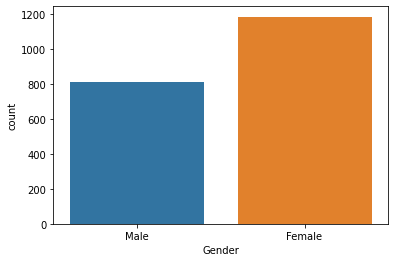

In [20]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:ylabel='Gender'>

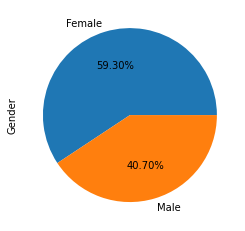

In [21]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%")

**Observation:-** Most of the customer are Female

- Age

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

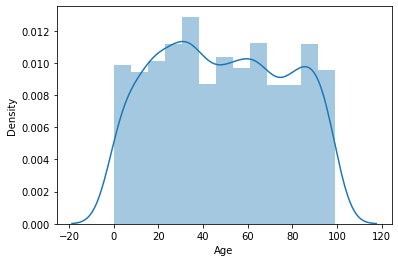

In [22]:
sns.distplot(df["Age"])

**Observation:-** It almost follows normal distribution

 - Spending Score (1-100)

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

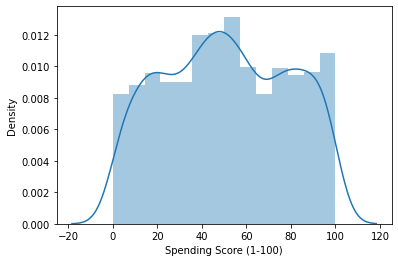

In [23]:
sns.distplot(df["Spending Score (1-100)"])

In [24]:
df["Spending Score (1-100)"].value_counts()

49    34
42    33
55    32
17    31
46    28
      ..
95    12
6     12
33    12
72    12
0      2
Name: Spending Score (1-100), Length: 101, dtype: int64

- Profession

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

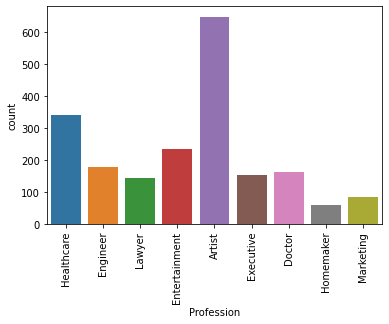

In [25]:
sns.countplot(x="Profession",data=df)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Profession'>

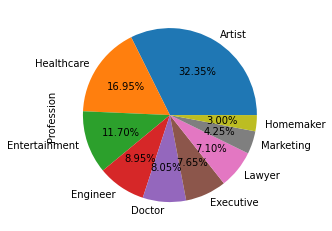

In [26]:
df["Profession"].value_counts().plot(kind="pie",autopct="%.2f%%")

**Observation:-** Most of the customer have profession as Artist

- Work Exp

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

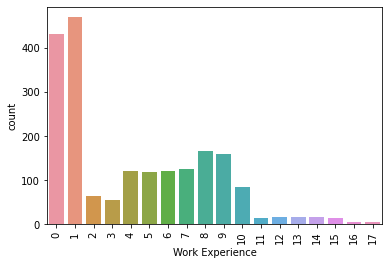

In [27]:
sns.countplot(x="Work Experience",data=df)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Work Experience'>

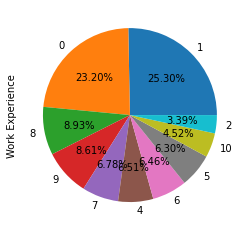

In [28]:
df["Work Experience"].value_counts().head(10).plot(kind="pie",autopct="%.2f%%")

**Observation:-** Most of the customer has work exp of 1 and lowest is 17

- Family Size

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

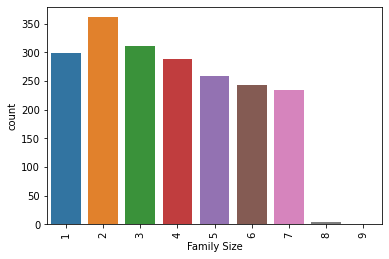

In [29]:
sns.countplot(x="Family Size",data=df)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Family Size'>

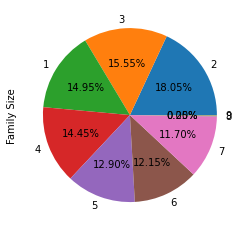

In [30]:
df["Family Size"].value_counts().head(10).plot(kind="pie",autopct="%.2f%%")

**Observation:-** Most of the customer have family size of 2 and lowest is 9

- Annual Income

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income ($)', ylabel='Density'>

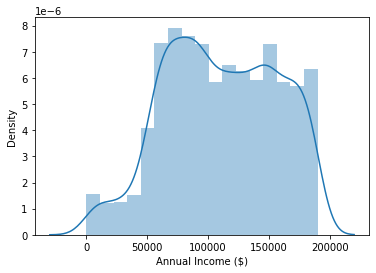

In [31]:
sns.distplot(df["Annual Income ($)"])

**Observation:-** It almost follows normal distribution

**Bivariate Analysis**

In [32]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


### 4.1  Annual Income based on the family size

In [33]:
df.groupby("Family Size")["Annual Income ($)"].mean().sort_values(ascending=False)

Family Size
6    119060.242798
7    118191.602564
5    114283.461240
4    109476.148789
1    108752.377926
3    106412.514469
2    104697.354571
8     78607.750000
9     30000.000000
Name: Annual Income ($), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family Size', ylabel='Annual Income ($)'>

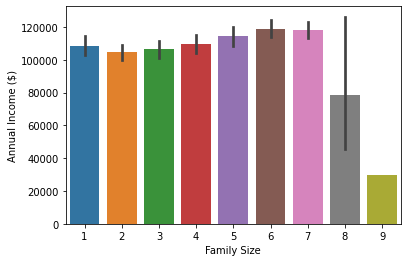

In [34]:
sns.barplot(df["Family Size"],df["Annual Income ($)"])

**Observation:-** The above graph indicates that the the annual income is highest for family size 6 and lowest for family size 9.

### 4.2  Annual Income based on the Profession

In [35]:
df.groupby("Profession")["Annual Income ($)"].mean().sort_values(ascending=False)

Profession
Executive        113770.130719
Healthcare       112574.041298
Doctor           111573.217391
Engineer         111161.240223
Lawyer           110995.838028
Entertainment    110650.333333
Artist           109234.081917
Homemaker        108758.616667
Marketing        107994.211765
Name: Annual Income ($), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

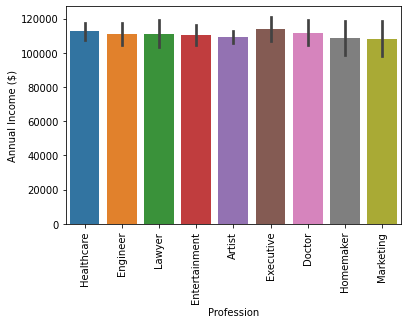

In [36]:
sns.barplot(df["Profession"],df["Annual Income ($)"])
plt.xticks(rotation=90)

**Observation:-** The annual income for all the profession is almost same.

### 4.3  Annual Income based on the Gender

In [37]:
df.groupby("Gender")["Annual Income ($)"].mean().sort_values(ascending=False)

Gender
Male      110991.323096
Female    110553.715008
Name: Annual Income ($), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

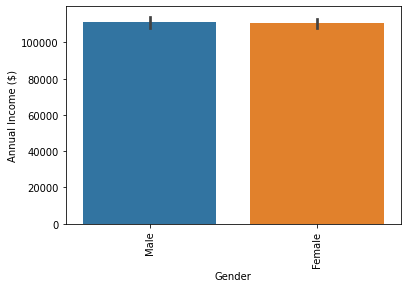

In [38]:
sns.barplot(df["Gender"],df["Annual Income ($)"])
plt.xticks(rotation=90)

**Observation:-** The annual income for both the gender is almost same.

### 4.4  Annual Income based on the Work Exp

In [39]:
df.groupby("Work Experience")["Annual Income ($)"].mean().sort_values(ascending=False)

Work Experience
14    133485.750000
13    126074.937500
17    123973.800000
15    121024.500000
11    120924.928571
12    118208.235294
6     117741.191667
10    115636.904762
8     115476.180723
9     114422.675000
3     114020.618182
4     113905.644628
7     111330.817460
1     107656.927660
5     106230.470085
0     106117.547564
2     105747.650794
16     93393.600000
Name: Annual Income ($), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

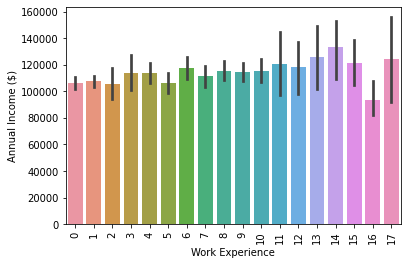

In [40]:
sns.barplot(df["Work Experience"],df["Annual Income ($)"])
plt.xticks(rotation=90)

**Observation:-** The highest annual income for customer having Work Exp 14 and lowest is 16.

### 4.5  Profession based on the Gender

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

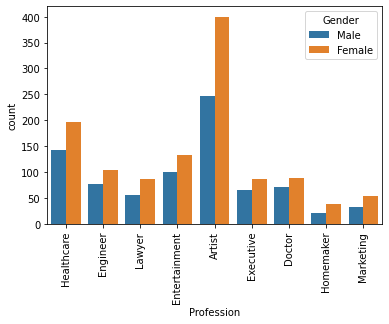

In [41]:
sns.countplot(df["Profession"],hue=df["Gender"])
plt.xticks(rotation=90)

**Observation:-** Most of the males and females are artist and there are very less Homemaker

### 4.6  Work Experience based on the Gender

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Experience', ylabel='count'>

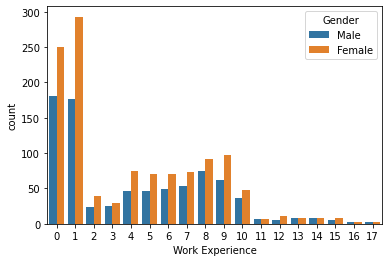

In [42]:
sns.countplot(df["Work Experience"],hue=df["Gender"])

**Observation:-** Most of the males and females have Work Experience of 1 and there are very less males and females with work experience of 17

### 4.7  Work Experience based on the Profession

In [43]:
pd.crosstab(df["Work Experience"],df["Profession"])

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Work Experience,,,,,,,,,
0,134,33,42,57,34,78,4,34,15
1,136,45,39,68,34,75,5,45,23
2,23,4,4,8,2,11,4,2,5
3,19,1,7,4,3,12,3,3,3
4,44,10,10,13,10,20,4,8,2
5,49,9,10,9,12,14,4,7,3
6,40,11,11,13,9,20,4,6,6
7,46,7,14,12,7,24,3,9,4
8,48,8,18,21,10,35,11,8,7


**Observation:-** There are large number of Artist havinng work experience of 1 year and 0 year

- There are very less customer who have work experience more 15

### 4.8 Family Size based on Gender

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family Size', ylabel='count'>

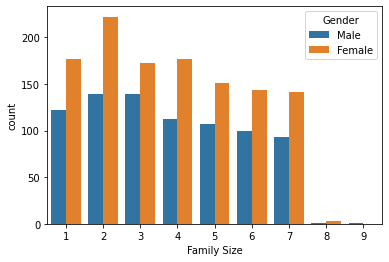

In [44]:
sns.countplot(df["Family Size"],hue=df["Gender"])

**Observation:-** Most of the males and females have family size of 2 and lowest family size of 9

### 4.9 Age based on gender

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

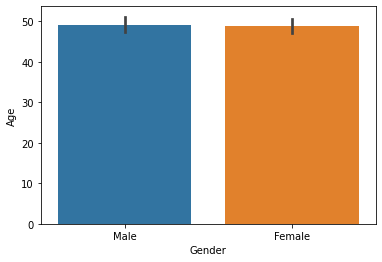

In [45]:
sns.barplot(df["Gender"],df["Age"])

**Observation:-** The average age of both male and female is almost same

### 4.10 Age based on Work Experience

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Experience', ylabel='Age'>

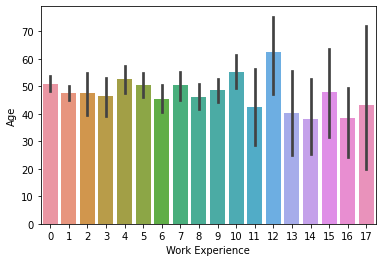

In [46]:
sns.barplot(df["Work Experience"],df["Age"])

**Observation:-** The average age is highest for customer having work exp of 12 and lowest is 14.

### 4.11 Spending Score based on Annual Income

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

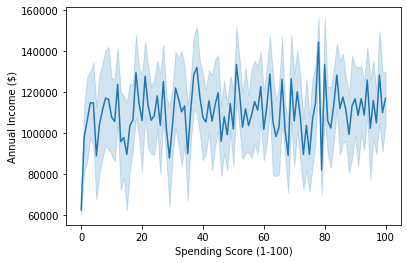

In [47]:
sns.lineplot(df["Spending Score (1-100)"],df["Annual Income ($)"])

**Observation:-** Customer having 80 spending score has high Annual Income

### 4.12 Spending Score based on Gender

In [48]:
df.groupby("Gender")["Spending Score (1-100)"].mean()

Gender
Female    50.974705
Male      50.944717
Name: Spending Score (1-100), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

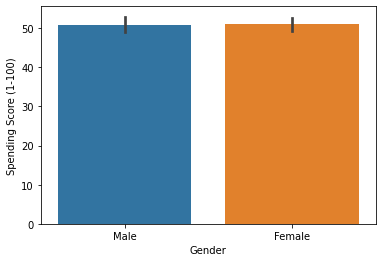

In [49]:
sns.barplot(df["Gender"],df["Spending Score (1-100)"])

**Observation:-** Male and female customers have almost same spending score

### 4.13 Spending Score based on Work Experience

In [50]:
df.groupby("Work Experience")["Spending Score (1-100)"].mean().sort_values(ascending=False)

Work Experience
3     58.363636
2     55.984127
6     55.000000
15    54.571429
10    53.821429
14    53.562500
0     51.262181
1     50.855319
8     50.765060
4     50.347107
7     50.047619
5     48.905983
9     46.350000
11    45.928571
12    45.294118
17    45.000000
13    42.687500
16    33.200000
Name: Spending Score (1-100), dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Experience', ylabel='Spending Score (1-100)'>

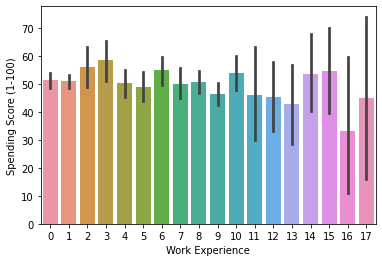

In [51]:
sns.barplot(df["Work Experience"],df["Spending Score (1-100)"])

**Observation:-** customers having work exp 16 have low spending score as compared to those having work exp as 3

### 4.14 Spending Score based on Family Size

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family Size', ylabel='Spending Score (1-100)'>

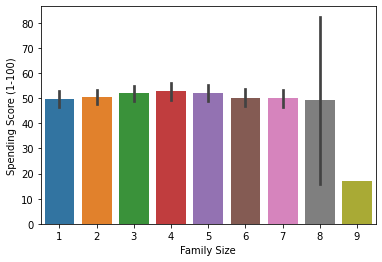

In [52]:
sns.barplot(df["Family Size"],df["Spending Score (1-100)"])

**Observation:-** customers having family size 9 have lowest spending score